In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dicelib  # https://github.com/mptouzel/PyDICE

In [2]:
dice_std = dicelib.DICE()  # create an instance of the model
dice_std.init_parameters(a2=0.01,limmiu=1.05)
dice_std.init_variables()
controls_start_std, controls_bounds_std = dice_std.get_control_bounds_and_startvalue()
dice_std.optimize_controls(controls_start_std, controls_bounds_std)
dice_std.roll_out(dice_std.optimal_controls)

/Users/bensan/Documents/Github/PyDICE/dicelib.py:263: RuntimeWarning: divide by zero encountered in scalar divide
  return self.alpha_so2*np.exp(-(self.beta_so2/iIS[index])**self.gamma_so2)
/Users/bensan/Documents/Github/PyDICE/.venv/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4456.299032724837
            Iterations: 91
            Function evaluations: 18424
            Gradient evaluations: 91


Run with SRM

In [3]:
dice_shrt = dicelib.DICE()
dice_shrt.init_parameters(a2=0.01,srm_frac=10,srm_decay=.5,srm_trg=1.5,scost=1.5e-3,srm_end=2080,limmiu=1.05)
dice_shrt.init_variables()
controls_start, controls_bounds = dice_shrt.get_control_bounds_and_startvalue()
dice_shrt.optimize_controls(controls_start, controls_bounds)
dice_shrt.roll_out(dice_shrt.optimal_controls)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4474.1779996067835
            Iterations: 94
            Function evaluations: 19027
            Gradient evaluations: 94


In [4]:
dice = dicelib.DICE()
dice.init_parameters(a2=0.01,srm_frac=10,srm_decay=.5,srm_trg=1.5,scost=1.5e-3,srm_end=2130,limmiu=1.05)
dice.init_variables()
controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()
dice.optimize_controls(controls_start, controls_bounds)
dice.roll_out(dice.optimal_controls)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4487.980603466789
            Iterations: 89
            Function evaluations: 18020
            Gradient evaluations: 89


In [5]:
dice_std1 = dicelib.DICE()  # create an instance of the model
dice_std1.init_parameters(a2=0.01,limmiu=1.05, prstp=0.02)
dice_std1.init_variables()
controls_start_std, controls_bounds_std = dice_std1.get_control_bounds_and_startvalue()
dice_std1.optimize_controls(controls_start_std, controls_bounds_std)
dice_std1.roll_out(dice_std1.optimal_controls)

dice_shrt1 = dicelib.DICE()
dice_shrt1.init_parameters(a2=0.01,srm_frac=10,srm_decay=.5,srm_trg=1.5,scost=1.5e-3,srm_end=2080,limmiu=1.05, prstp=0.02)
dice_shrt1.init_variables()
controls_start, controls_bounds = dice_shrt1.get_control_bounds_and_startvalue()
dice_shrt1.optimize_controls(controls_start, controls_bounds)
dice_shrt1.roll_out(dice_shrt1.optimal_controls)

dice1 = dicelib.DICE()
dice1.init_parameters(a2=0.01,srm_frac=10,srm_decay=.5,srm_trg=1.5,scost=1.5e-3,srm_end=2130,limmiu=1.05, prstp=0.02)
dice1.init_variables()
controls_start, controls_bounds = dice1.get_control_bounds_and_startvalue()
dice1.optimize_controls(controls_start, controls_bounds)
dice1.roll_out(dice1.optimal_controls)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 276.0071758272916
            Iterations: 81
            Function evaluations: 16390
            Gradient evaluations: 81
Optimization terminated successfully    (Exit mode 0)
            Current function value: 260.9073415760213
            Iterations: 75
            Function evaluations: 15181
            Gradient evaluations: 75
Optimization terminated successfully    (Exit mode 0)
            Current function value: 250.28194808777698
            Iterations: 79
            Function evaluations: 15990
            Gradient evaluations: 79


Text(0, 0.5, 'ppm')

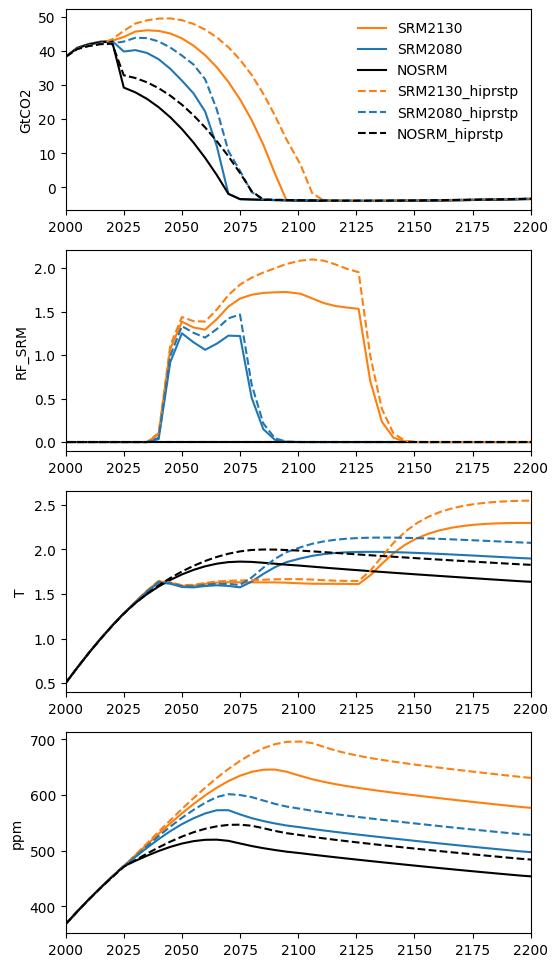

In [6]:
p,a=plt.subplots(4,1,figsize=[6,12])
a[0].plot(dice.TT, dice.E, 'tab:orange',label='SRM2130')
a[0].plot(dice.TT, dice_shrt.E, 'tab:blue',label='SRM2080')
a[0].plot(dice.TT, dice_std.E, 'k',label='NOSRM')
a[0].plot(dice.TT, dice1.E, 'tab:orange',label='SRM2130_hiprstp',linestyle='--')
a[0].plot(dice.TT, dice_shrt1.E, 'tab:blue',label='SRM2080_hiprstp',linestyle='--')
a[0].plot(dice.TT, dice_std1.E, 'k',label='NOSRM_hiprstp',linestyle='--')
a[0].set_xlim([2000, 2200])
a[0].set_ylabel('GtCO2')
a[0].legend(frameon=False)



a[1].plot(dice.TT, dice.SRM, 'tab:orange')
a[1].plot(dice.TT, dice_shrt.SRM, 'tab:blue')
a[1].plot(dice.TT, dice_std.SRM, 'k')
a[1].plot(dice.TT, dice1.SRM, 'tab:orange',linestyle='--')
a[1].plot(dice.TT, dice_shrt1.SRM, 'tab:blue',linestyle='--')
a[1].plot(dice.TT, dice_std1.SRM, 'k',linestyle='--')
a[1].set_xlim([2000, 2200])
a[1].set_ylabel('RF_SRM')

a[2].plot(dice.TT, dice.TATM, 'tab:orange')
a[2].plot(dice.TT, dice_shrt.TATM, 'tab:blue')
a[2].plot(dice.TT, dice_std.TATM, 'k')
a[2].plot(dice.TT, dice1.TATM, 'tab:orange',linestyle='--')
a[2].plot(dice.TT, dice_shrt1.TATM, 'tab:blue',linestyle='--')
a[2].plot(dice.TT, dice_std1.TATM, 'k',linestyle='--')

a[2].set_xlim([2000, 2200])
a[2].set_ylabel('T')

a[3].plot(dice.TT, dice.MAT/2.13, 'tab:orange')
a[3].plot(dice.TT, dice_shrt.MAT/2.13, 'tab:blue')
a[3].plot(dice.TT, dice_std.MAT/2.13, 'k')
a[3].plot(dice.TT, dice1.MAT/2.13, 'tab:orange',linestyle='--')
a[3].plot(dice.TT, dice_shrt1.MAT/2.13, 'tab:blue',linestyle='--')
a[3].plot(dice.TT, dice_std1.MAT/2.13, 'k',linestyle='--')

a[3].set_xlim([2000, 2200])
a[3].set_ylabel('ppm')




(0.0, 0.5)

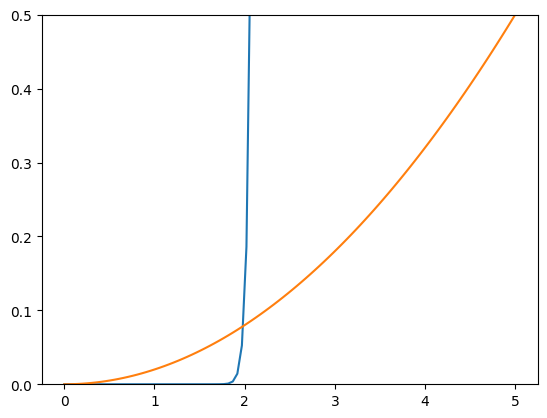

In [35]:
x=np.linspace(0,5,100)
plt.plot(x,1e-16*x**50)
plt.plot(x,0.02*x**2)

plt.ylim([0,.5])

In [49]:
ndice_srm = dicelib.DICE()
ndice_srm.init_parameters(a2=1e-16,srm_frac=10,srm_decay=.5,srm_trg=1.4,scost=1.5e-3,srm_end=2130,limmiu=1.05,a3=50)
ndice_srm.init_variables()
controls_start, controls_bounds = ndice_srm.get_control_bounds_and_startvalue()
ndice_srm.optimize_controls(controls_start, controls_bounds)
ndice_srm.roll_out(ndice_srm.optimal_controls)

/Users/bensan/Documents/Github/PyDICE/dicelib.py:263: RuntimeWarning: divide by zero encountered in scalar divide
  return self.alpha_so2*np.exp(-(self.beta_so2/iIS[index])**self.gamma_so2)
/Users/bensan/Documents/Github/PyDICE/dicelib.py:373: RuntimeWarning: invalid value encountered in scalar power
  return ((iC[index]*1000/il[index])**(1-self.elasmu) - 1) / (1 - self.elasmu) - 1
/Users/bensan/Documents/Github/PyDICE/dicelib.py:334: RuntimeWarning: invalid value encountered in scalar power
  return ial[index] * ((il[index]/1000)**(1-self.gama)) * iK[index]**self.gama
/Users/bensan/Documents/Github/PyDICE/.venv/lib/python3.9/site-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4592.099390582542
            Iterations: 94
            Function evaluations: 19026
            Gradient evaluations: 94


In [50]:
ndice_srm2 = dicelib.DICE()
ndice_srm2.init_parameters(a2=1e-16,srm_frac=10,srm_decay=.5,srm_trg=1.4,scost=1.5e-3,srm_end=2080,limmiu=1.05,a3=50)
ndice_srm2.init_variables()
controls_start, controls_bounds = ndice_srm2.get_control_bounds_and_startvalue()
ndice_srm2.optimize_controls(controls_start, controls_bounds)
ndice_srm2.roll_out(ndice_srm2.optimal_controls)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4586.41213062799
            Iterations: 99
            Function evaluations: 20033
            Gradient evaluations: 99


In [51]:
ndice = dicelib.DICE()
ndice.init_parameters(a2=1e-16,limmiu=1.05,a3=50)
ndice.init_variables()
controls_start, controls_bounds = ndice.get_control_bounds_and_startvalue()
ndice.optimize_controls(controls_start, controls_bounds)
ndice.roll_out(ndice.optimal_controls)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4576.180267139229
            Iterations: 98
            Function evaluations: 19843
            Gradient evaluations: 98


Text(0, 0.5, 'ppm')

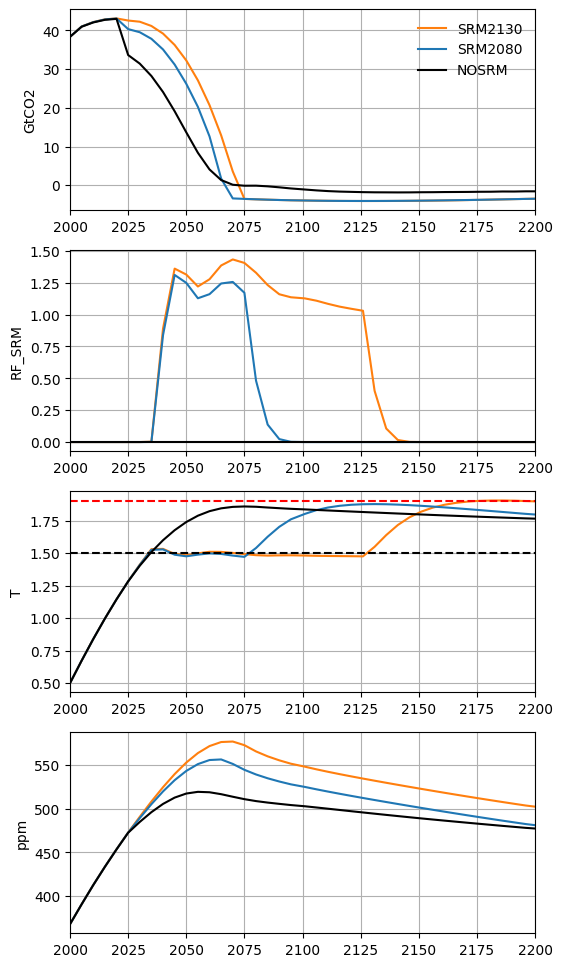

In [56]:
p,a=plt.subplots(4,1,figsize=[6,12])
a[0].plot(dice.TT, ndice_srm.E, 'tab:orange',label='SRM2130')
a[0].plot(dice.TT, ndice_srm2.E, 'tab:blue',label='SRM2080')

a[0].plot(dice.TT, ndice.E, 'k',label='NOSRM')
a[0].set_xlim([2000, 2200])
a[0].set_ylabel('GtCO2')
a[0].legend(frameon=False)
a[0].grid()
a[1].plot(dice.TT, ndice_srm.SRM, 'tab:orange')
a[1].plot(dice.TT, ndice_srm2.SRM, 'tab:blue')

a[1].plot(dice.TT, ndice.SRM, 'k')
a[1].set_xlim([2000, 2200])
a[1].set_ylabel('RF_SRM')
a[1].grid()
a[2].plot(dice.TT, ndice_srm.TATM, 'tab:orange')
a[2].plot(dice.TT, ndice_srm2.TATM, 'tab:blue')
a[2].plot(dice.TT, ndice.TATM, 'k')
a[2].axhline(y=1.5, color='k',linestyle='--')
a[2].axhline(y=1.9, color='r',linestyle='--')
a[2].grid()


a[2].set_xlim([2000, 2200])
a[2].set_ylabel('T')

a[3].plot(dice.TT, ndice_srm.MAT/2.13, 'tab:orange')
a[3].plot(dice.TT, ndice_srm2.MAT/2.13, 'tab:blue')
a[3].plot(dice.TT, ndice.MAT/2.13, 'k')
a[3].grid()
a[3].set_xlim([2000, 2200])
a[3].set_ylabel('ppm')


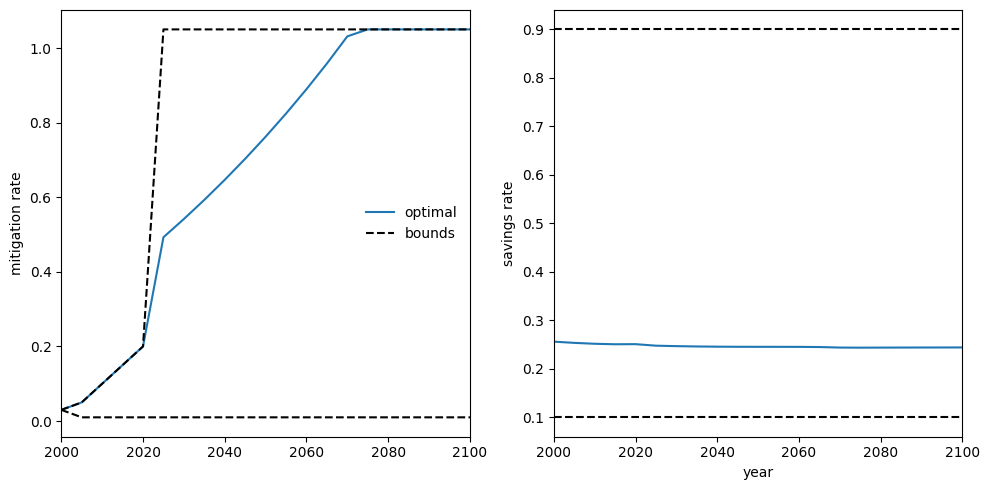

In [10]:
fig, ax = plt.subplots(1, 2,figsize=[10,5])
max_year = 2100
TT = dice_std.TT
NT = dice_std.NT
upp, low = zip(*controls_bounds_std[:NT])
ax[0].plot(TT, dice_std.optimal_controls[:NT], label="optimal")
ax[0].plot(TT, upp, "k--", label="bounds")
ax[0].plot(TT, low, "k--")
ax[0].set_ylabel("mitigation rate")
ax[0].set_xlim(2000, max_year)
ax[0].legend(frameon=False)
upp, low = zip(*controls_bounds_std[NT:])
ax[1].plot(TT, dice_std.optimal_controls[NT:])
ax[1].plot(TT, upp, "k--")
ax[1].plot(TT, low, "k--")
ax[1].set_ylabel("savings rate")
ax[1].set_xlabel("year")
ax[1].set_xlim(2000, max_year)

fig.tight_layout()

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_88465/3605513576.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(isrg,-10*np.exp(-(8/isrg)**0.5))


Text(0, 0.5, 'Radiative Forcing (Wm$^{-2}$)')

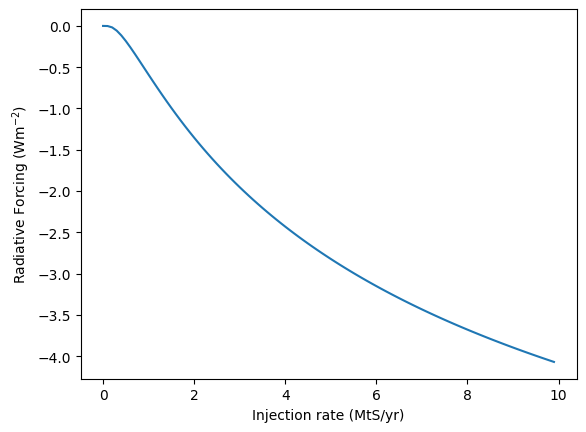

In [11]:
isrg=np.arange(0,10,.1)
plt.plot(isrg,-10*np.exp(-(8/isrg)**0.5))
plt.xlabel('Injection rate (MtS/yr)')
plt.ylabel('Radiative Forcing (Wm$^{-2}$)')

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_88465/2170604048.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(dice_std.TT, -10*np.exp(-(8000/dice.IS)**0.5),'k--')


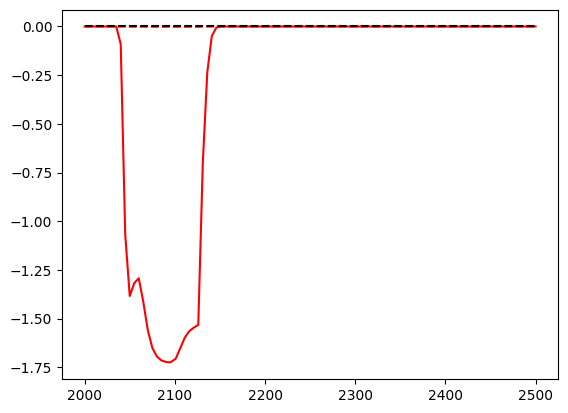

In [12]:
plt.plot(dice_std.TT,-dice.SRM,'r')
plt.plot(dice_std.TT,-.5*dice.IS/1000+(0.2/25)*(dice.IS/1000)**2,'r--')
plt.plot(dice_std.TT, -10*np.exp(-(8000/dice.IS)**0.5),'k--')



Change the discount rate from 1.5% to 0.5%

In [13]:
dice = dicelib.DICE()
dice.init_parameters(srm_frac=10000,srm_decay=.8,srm_trg=1.5,scost=14e-9, prstp=0.5)
dice.init_variables()
controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()
dice.optimize_controls(controls_start, controls_bounds)
dice.roll_out(dice.optimal_controls)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 10321.701983253079
            Iterations: 20
            Function evaluations: 4020
            Gradient evaluations: 20


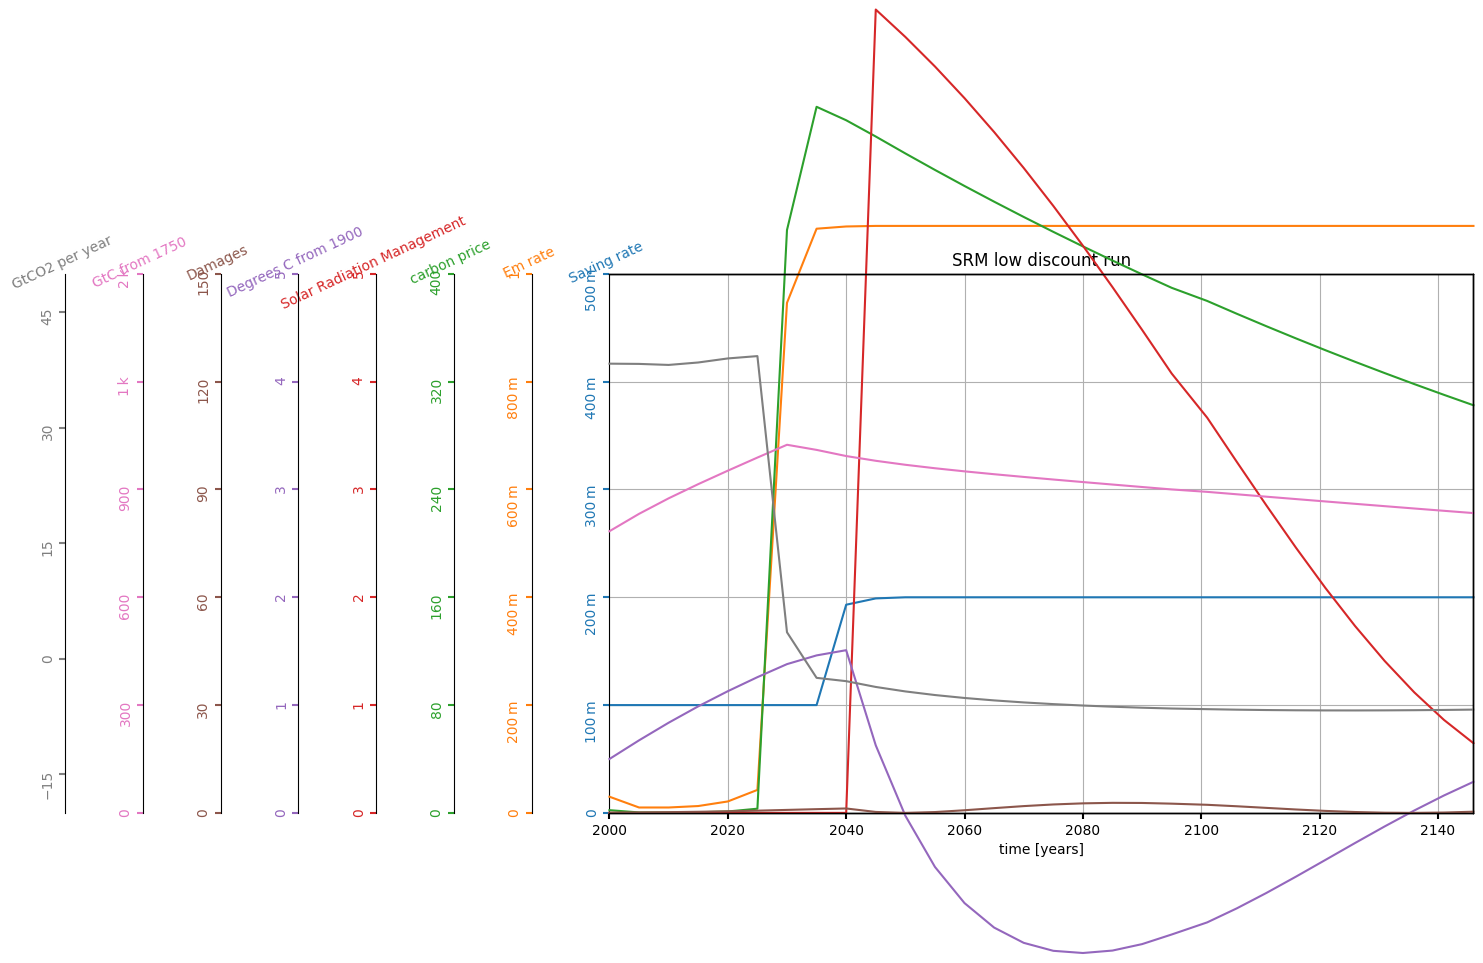

In [14]:
dice.plot_run("SRM low discount run")